In [3]:
# 📦 Import Dependencies
import os
import sys
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Ensure project root is in sys.path for local imports
PROJECT_ROOT = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(PROJECT_ROOT)

from models.autoencoder import ConvAutoencoder


In [4]:
# ⚙️ Config--Cell 2 – Config + Load Model
IMAGE_SIZE = (128, 128)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = os.path.join(PROJECT_ROOT, "models", "checkpoints", "autoencoder.pth")

# Load Model
def load_model():
    model = ConvAutoencoder().to(DEVICE)
    model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
    model.eval()
    return model

model = load_model()


In [5]:
#🧪 Cell 3 – Preprocessing + Inference
# 📐 Define transforms
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()
])

# 🔁 Reconstruction + scoring
def infer_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        reconstruction = model(image_tensor)
        loss = F.mse_loss(reconstruction, image_tensor).item()
    return image, reconstruction.squeeze().cpu(), round(loss, 5)


In [6]:
#Cell 4 – Visual Comparison Function
# 🖼️ Visualize input vs reconstruction
def show_comparison(image_path, threshold=0.014879):
    original, reconstructed, score = infer_image(image_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(reconstructed.permute(1, 2, 0))
    axes[1].set_title("Reconstruction")
    axes[1].axis("off")

    verdict = "✅ REAL" if score < threshold else "⚠️ SUSPECT / FAKE"
    plt.suptitle(f"Score: {score}  →  {verdict}", fontsize=14, color="green" if verdict == "✅ REAL" else "red")
    plt.show()


d:\Documents\CODE_WITH_ERICADESHH\GitHub\HarvestGuard\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


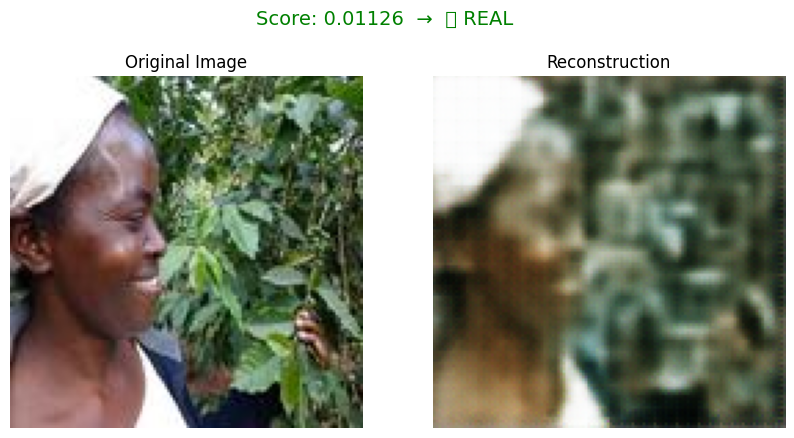

In [7]:
#🔍 Cell 5 – Run Demo on a Sample
# 📂 Choose a sample image to test
sample_path = os.path.join(PROJECT_ROOT, "data", "preprocessed", "fertilizer", "YaraMila", "000015.jpg")
show_comparison(sample_path)
